## Which customers should the client grow their business with?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
panel_data = pd.read_excel('../data/DSA3101_Hackathon_Panelists_Demographics.xlsx') 
cat_data = pd.read_csv('../data/DSA3101_Hackathon_Categories_Information.csv')
data = pd.read_csv('../data/DSA3101_Hackathon_Data.csv')


In [3]:
panel_data.head()
data

,Panel ID,Date,Category,Pack Size,Volume,Spend
0,Panel 101011101,2017-07-02,CSD,1,1.5,1.5
1,Panel 101011101,2017-07-02,Soy Milk,1,1.0,2.8
2,Panel 101011101,2017-07-02,Cooking Sauces,1,0.3,3.2
3,Panel 101011101,2017-07-02,Coconut Milk,2,0.4,5.3
4,Panel 101011101,2017-07-02,Chocolate,1,0.2,6.6
...,...,...,...,...,...,...
1318019,Panel 801912801,2020-02-23,MSG,1,0.1,2.2
1318020,Panel 801912801,2020-02-23,Eggs,1,30.0,8.4
1318021,Panel 801912801,2020-02-23,Ice Cream,1,1.5,8.0
1318022,Panel 801912801,2020-02-23,Cooking Sauces,1,0.7,4.8


In [4]:
unique = data['Panel ID'].unique()
panel_data = panel_data[panel_data['ID'].isin(unique)] #removing customers who did not visited at all

In [5]:
panel_data

,ID,BMI,Income,Ethnicity,Lifestage,Strata,#HH,location
0,Panel 101011101,Obese,Income 1500 - 1999,North Malay,Empty Nesters,Urban,1-3 Member HH,North
1,Panel 101016101,Healthy,Income 1500 - 1999,North Malay,Teens Aches,Urban,1-3 Member HH,North
2,Panel 101019101,Obese,Income < 1500,North Malay,Teens Aches,Urban,4 Member HH,North
3,Panel 101024101,Over Weight,Income 1500 - 1999,North Chinese,Nesting Families,Urban,1-3 Member HH,North
4,Panel 105009103,Over Weight,Income < 1500,North Malay,Empty Nesters,Rural,1-3 Member HH,North
...,...,...,...,...,...,...,...,...
3825,Panel 801900701,Healthy,Income >5000,Central Others,Yankys,Urban,1-3 Member HH,Central
3826,Panel 801901201,Over Weight,Income >5000,Central Malay,Teens and Toddlers,Urban,6 Member HH,Central
3829,Panel 801903201,Obese,Income 3000 - 3999,Central Malay,Teens and Toddlers,Urban,7+ Member HH,Central
3831,Panel 801903801,Healthy,Income 1500 - 1999,Central Malay,Yankys,Urban,1-3 Member HH,Central


In [6]:
#check for missing values (count)
data.isnull().sum()
cat_data.isnull().sum()
panel_data.isnull().sum()

ID           0
BMI          0
Income       0
Ethnicity    0
Lifestage    0
Strata       0
#HH          0
location     0
dtype: int64

The data sets has no missing informatio.

In [7]:
data['Date'] = pd.to_datetime(data['Date'])
refDate = data['Date'].max()   #Creating the baseline date 
refDate

Timestamp('2020-06-14 00:00:00')

In [8]:
data_recent = data[data['Date'] >= '2019-06-14']
data_normal = data[(data['Date']< '2019-06-14') & (data['Date']>= '2018-06-14')] 
data_churn = data[data['Date'] < '2018-06-14']                                                

sepaprating the data set into three groups based on recency. 
maximum recency from the reference date is 1082 days hence each period about a year.
data_recent: transaction data within a year. 
data_normal: transaction data 1-2 year ago.
data_churn: transaction data 2 years ago.

In [9]:
data_recent['Date2'] = data_recent['Date'] 
model_recent = data_recent.groupby('Panel ID').agg({'Date': lambda x: (refDate-x.max()).days,    #Creating the RFM model dataframe
                                            'Date2': lambda x: x.nunique(),
                                            'Spend': lambda x : x.sum()} )

model_recent.rename(columns={'Date' : 'Recency','Date2':'Frequency', 'Spend':'Monetary'},inplace=True)
model_recent = model_recent.reset_index()
model_recent

<ipython-input-9-47acb2e3c2a5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_recent['Date2'] = data_recent['Date']


,Panel ID,Recency,Frequency,Monetary
0,Panel 101011101,14,38,1670.2
1,Panel 101016101,7,26,593.8
2,Panel 101019101,0,50,2718.8
3,Panel 101024101,0,50,1813.3
4,Panel 105009103,0,53,1522.6
...,...,...,...,...
2403,Panel 801900701,28,10,216.9
2404,Panel 801901201,0,22,1165.0
2405,Panel 801903201,168,3,400.0
2406,Panel 801903801,0,15,289.5


In [10]:
model_normal = data_normal.groupby('Panel ID').agg({'Date': lambda x: x.nunique(),
                                                    'Spend': lambda x : x.sum()} )

model_normal.rename(columns={'Date':'Frequency2', 'Spend':'Monetary2'},inplace=True)
model_normal = model_normal.reset_index()
model_normal

,Panel ID,Frequency2,Monetary2
0,Panel 101011101,37,1190.9
1,Panel 101016101,18,630.8
2,Panel 101019101,52,2515.6
3,Panel 101024101,52,2147.4
4,Panel 105009103,52,1598.3
...,...,...,...
2489,Panel 801667901,1,11.2
2490,Panel 801680301,2,158.9
2491,Panel 801687701,3,176.4
2492,Panel 801687801,3,34.5


count    2408.000000
mean       45.322674
std        93.084280
min         0.000000
25%         0.000000
50%         0.000000
75%        21.000000
max       364.000000
Name: Recency, dtype: float64


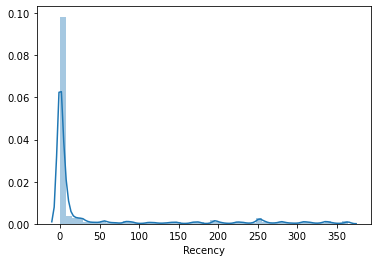

In [11]:
print(model_recent.Recency.describe())
x = model_recent['Recency']
distplot = sns.distplot(x)     

75% in the recent group visited within 21 days. 

count    2408.000000
mean       33.755399
std        15.162586
min         1.000000
25%        23.000000
50%        37.000000
75%        47.000000
max        53.000000
Name: Frequency, dtype: float64


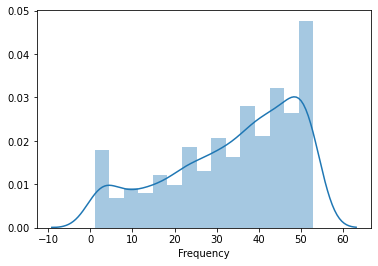

In [12]:
print(model_recent.Frequency.describe())
x = model_recent['Frequency']
distplot = sns.distplot(x)     

count    2494.000000
mean       32.160786
std        15.756604
min         1.000000
25%        20.000000
50%        35.000000
75%        46.000000
max        52.000000
Name: Frequency2, dtype: float64


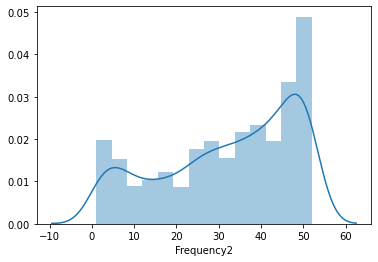

In [13]:
print(model_normal.Frequency2.describe())
x = model_normal['Frequency2']
distplot = sns.distplot(x)     

count     2408.000000
mean      1760.929111
std       1360.396136
min          5.600000
25%        851.825000
50%       1487.350000
75%       2396.550000
max      14500.600000
Name: Monetary, dtype: float64


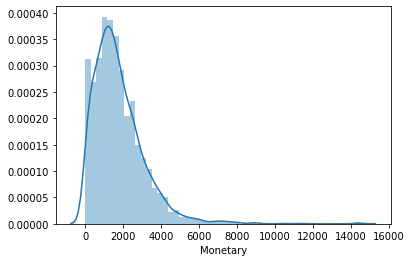

In [14]:
print(model_recent.Monetary.describe())
x = model_recent['Monetary']
distplot = sns.distplot(x)     


count     2494.000000
mean      1628.824138
std       1327.568639
min          2.000000
25%        704.250000
50%       1367.050000
75%       2232.950000
max      17724.300000
Name: Monetary2, dtype: float64


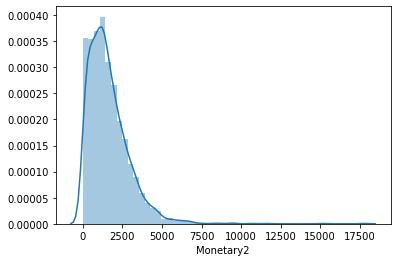

In [15]:
print(model_normal.Monetary2.describe())
x = model_normal['Monetary2']
distplot = sns.distplot(x)     


Distribution of both frequency and monetary for both periods does not differ significantly from each other.
-> buying behaviours of the customers for the two periods are quite consistent on a general level.

In [16]:
quantiles = model_recent.quantile(q=[0.2,0.4,0.6,0.8]) # Get a dataframe of quantiles for each column
quantiles = quantiles.to_dict() #Convert the dataframe into a nested dictionary of quantiles
print(quantiles)



{'Recency': {0.2: 0.0, 0.4: 0.0, 0.6: 7.0, 0.8: 56.0}, 'Frequency': {0.2: 20.0, 0.4: 32.0, 0.6: 41.0, 0.8: 48.0}, 'Monetary': {0.2: 685.56, 0.4: 1233.06, 0.6: 1794.1, 0.8: 2616.36}}


In [17]:
quantiles2 = model_normal.quantile(q=[0.2,0.4,0.6,0.8]) # Get a dataframe of quantiles for each column
quantiles2 = quantiles2.to_dict() #Convert the dataframe into a nested dictionary of quantiles
print(quantiles2)



{'Frequency2': {0.2: 16.0, 0.4: 30.0, 0.6: 40.0, 0.8: 48.0}, 'Monetary2': {0.2: 562.44, 0.4: 1115.6400000000003, 0.6: 1651.6, 0.8: 2494.9400000000005}}


# RFM Model

In [18]:
def RScores(x,p,d):   #Functions to get the RFM scores. For R scores, the smaller the number the higher the rank (most recent)
    if x <= d[p][0.2]:
        return 5
    elif x <= d[p][0.4]:
        return 4
    elif x <= d[p][0.6]:
        return 3
    elif x <= d[p][0.8]:
        return 2
    else:
        return 1
    
def FMScores(x,p,d):     #Function to get F and M scores. The more cusmoter spent and the more frequent they visit, the higher the rank.
    if x <= d[p][0.2]:   
        return 1
    elif x <= d[p][0.4]:
        return 2
    elif x <= d[p][0.6]:
        return 3
    elif x <= d[p][0.8]:
        return 4
    else:
        return 5

In [19]:
model_recent['R'] = model_recent['Recency'].apply(FMScores,args=('Recency',quantiles))
model_recent['F'] = model_recent['Frequency'].apply(FMScores,args=('Frequency',quantiles))
model_recent['M'] = model_recent['Monetary'].apply(FMScores,args=('Monetary',quantiles))
model_recent['RFM'] =model_recent.R.map(str)+model_recent.F.map(str) + model_recent.M.map(str)
model_recent

,Panel ID,Recency,Frequency,Monetary,R,F,M,RFM
0,Panel 101011101,14,38,1670.2,4,3,3,433
1,Panel 101016101,7,26,593.8,3,2,1,321
2,Panel 101019101,0,50,2718.8,1,5,5,155
3,Panel 101024101,0,50,1813.3,1,5,4,154
4,Panel 105009103,0,53,1522.6,1,5,3,153
...,...,...,...,...,...,...,...,...
2403,Panel 801900701,28,10,216.9,4,1,1,411
2404,Panel 801901201,0,22,1165.0,1,2,2,122
2405,Panel 801903201,168,3,400.0,5,1,1,511
2406,Panel 801903801,0,15,289.5,1,1,1,111


In [20]:
model_normal['F2'] = model_normal['Frequency2'].apply(FMScores,args=('Frequency2',quantiles2))
model_normal['M2'] = model_normal['Monetary2'].apply(FMScores,args=('Monetary2',quantiles2))
model_normal['FM2'] = model_normal.F2.map(str) + model_normal.M2.map(str)
model_normal


,Panel ID,Frequency2,Monetary2,F2,M2,FM2
0,Panel 101011101,37,1190.9,3,3,33
1,Panel 101016101,18,630.8,2,2,22
2,Panel 101019101,52,2515.6,5,5,55
3,Panel 101024101,52,2147.4,5,4,54
4,Panel 105009103,52,1598.3,5,3,53
...,...,...,...,...,...,...
2489,Panel 801667901,1,11.2,1,1,11
2490,Panel 801680301,2,158.9,1,1,11
2491,Panel 801687701,3,176.4,1,1,11
2492,Panel 801687801,3,34.5,1,1,11


In [21]:
joined = model_recent.merge(model_normal, left_on='Panel ID', right_on='Panel ID', how='outer').fillna(0)

In [22]:
joined['F_change'] = joined['F'] - joined['F2'] 
joined['M_change'] = joined['M'] - joined['M2']
joined


,Panel ID,Recency,Frequency,Monetary,R,F,M,RFM,Frequency2,Monetary2,F2,M2,FM2,F_change,M_change
0,Panel 101011101,14.0,38.0,1670.2,4.0,3.0,3.0,433,37.0,1190.9,3.0,3.0,33,0.0,0.0
1,Panel 101016101,7.0,26.0,593.8,3.0,2.0,1.0,321,18.0,630.8,2.0,2.0,22,0.0,-1.0
2,Panel 101019101,0.0,50.0,2718.8,1.0,5.0,5.0,155,52.0,2515.6,5.0,5.0,55,0.0,0.0
3,Panel 101024101,0.0,50.0,1813.3,1.0,5.0,4.0,154,52.0,2147.4,5.0,4.0,54,0.0,0.0
4,Panel 105009103,0.0,53.0,1522.6,1.0,5.0,3.0,153,52.0,1598.3,5.0,3.0,53,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2782,Panel 801627201,0.0,0.0,0.0,0.0,0.0,0.0,0,2.0,112.0,1.0,1.0,11,-1.0,-1.0
2783,Panel 801632501,0.0,0.0,0.0,0.0,0.0,0.0,0,3.0,67.5,1.0,1.0,11,-1.0,-1.0
2784,Panel 801640901,0.0,0.0,0.0,0.0,0.0,0.0,0,1.0,79.0,1.0,1.0,11,-1.0,-1.0
2785,Panel 801647801,0.0,0.0,0.0,0.0,0.0,0.0,0,2.0,244.9,1.0,1.0,11,-1.0,-1.0


In [23]:
mean_group = model_recent[['R','F','M']].quantile([.25, .5,.75])
print(mean_group)


        R    F    M
0.25  1.0  2.0  2.0
0.50  1.0  3.0  3.0
0.75  4.0  4.0  4.0


In [24]:
mean_group2 = model_normal[['F2','M2']].quantile([.25, .5,.75])
print(mean_group2)



       F2   M2
0.25  2.0  2.0
0.50  3.0  3.0
0.75  4.0  4.0


Quantile of the rfm scores for model_recent and model_normal.

count    2787.000000
mean       -0.076067
std         1.299383
min        -5.000000
25%        -1.000000
50%         0.000000
75%         1.000000
max         5.000000
Name: F_change, dtype: float64


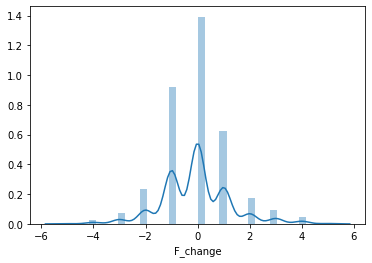

In [25]:
print(joined.F_change.describe())
x = joined['F_change']
distplot = sns.distplot(x)     



count    2787.000000
mean       -0.092573
std         1.389908
min        -5.000000
25%        -1.000000
50%         0.000000
75%         1.000000
max         5.000000
Name: M_change, dtype: float64


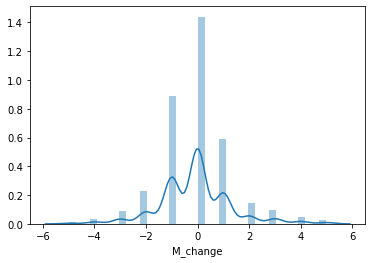

In [26]:
print(joined.M_change.describe())
x = joined['M_change']
distplot = sns.distplot(x)     



In [27]:
#print(joined.R.describe())
#x = joined['R']
#distplot = sns.distplot(x)  

joined


,Panel ID,Recency,Frequency,Monetary,R,F,M,RFM,Frequency2,Monetary2,F2,M2,FM2,F_change,M_change
0,Panel 101011101,14.0,38.0,1670.2,4.0,3.0,3.0,433,37.0,1190.9,3.0,3.0,33,0.0,0.0
1,Panel 101016101,7.0,26.0,593.8,3.0,2.0,1.0,321,18.0,630.8,2.0,2.0,22,0.0,-1.0
2,Panel 101019101,0.0,50.0,2718.8,1.0,5.0,5.0,155,52.0,2515.6,5.0,5.0,55,0.0,0.0
3,Panel 101024101,0.0,50.0,1813.3,1.0,5.0,4.0,154,52.0,2147.4,5.0,4.0,54,0.0,0.0
4,Panel 105009103,0.0,53.0,1522.6,1.0,5.0,3.0,153,52.0,1598.3,5.0,3.0,53,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2782,Panel 801627201,0.0,0.0,0.0,0.0,0.0,0.0,0,2.0,112.0,1.0,1.0,11,-1.0,-1.0
2783,Panel 801632501,0.0,0.0,0.0,0.0,0.0,0.0,0,3.0,67.5,1.0,1.0,11,-1.0,-1.0
2784,Panel 801640901,0.0,0.0,0.0,0.0,0.0,0.0,0,1.0,79.0,1.0,1.0,11,-1.0,-1.0
2785,Panel 801647801,0.0,0.0,0.0,0.0,0.0,0.0,0,2.0,244.9,1.0,1.0,11,-1.0,-1.0


In [28]:
def group(df):
    if (df['R'] <= 2 ) & (df['F'] >= 4) & (df['M'] >= 4):   
        return 'Loyal'
   
    elif (df['F_change'] > 0) & (df['M_change'] > 0) & (df['Recency'] <= 56):  ##Those spending more and visiting more as compard to 1 year ago
        return 'Improving'
   
    elif (df['F_change'] <= 0) & (df['M_change'] <= 0) & (df['Recency'] >= 56):   
        return 'Churning' #havent vist for 2 weeks, visit less and spend less compared to last year.

    else: 
        return 'Normal'

loyal : visited frequent and recent, spend the most.

Improving customer: Customers who visited in the past 56 days. They are also spending more, visiting more frequently as compared to last year.

churning: spend less and visit less as compared to last year, and hasn't visited for more than 56 days

normal: all other customers

In [29]:
joined['status'] = joined.apply(group, axis=1)
joined


,Panel ID,Recency,Frequency,Monetary,R,F,M,RFM,Frequency2,Monetary2,F2,M2,FM2,F_change,M_change,status
0,Panel 101011101,14.0,38.0,1670.2,4.0,3.0,3.0,433,37.0,1190.9,3.0,3.0,33,0.0,0.0,Normal
1,Panel 101016101,7.0,26.0,593.8,3.0,2.0,1.0,321,18.0,630.8,2.0,2.0,22,0.0,-1.0,Normal
2,Panel 101019101,0.0,50.0,2718.8,1.0,5.0,5.0,155,52.0,2515.6,5.0,5.0,55,0.0,0.0,Loyal
3,Panel 101024101,0.0,50.0,1813.3,1.0,5.0,4.0,154,52.0,2147.4,5.0,4.0,54,0.0,0.0,Loyal
4,Panel 105009103,0.0,53.0,1522.6,1.0,5.0,3.0,153,52.0,1598.3,5.0,3.0,53,0.0,0.0,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2782,Panel 801627201,0.0,0.0,0.0,0.0,0.0,0.0,0,2.0,112.0,1.0,1.0,11,-1.0,-1.0,Normal
2783,Panel 801632501,0.0,0.0,0.0,0.0,0.0,0.0,0,3.0,67.5,1.0,1.0,11,-1.0,-1.0,Normal
2784,Panel 801640901,0.0,0.0,0.0,0.0,0.0,0.0,0,1.0,79.0,1.0,1.0,11,-1.0,-1.0,Normal
2785,Panel 801647801,0.0,0.0,0.0,0.0,0.0,0.0,0,2.0,244.9,1.0,1.0,11,-1.0,-1.0,Normal


In [30]:
joined['status'] = joined.apply(group, axis=1)
joined['status']
joined['status'].value_counts()

Normal       1683
Loyal         581
Churning      279
Improving     244
Name: status, dtype: int64

In [31]:
full = panel_data.merge(joined, left_on='ID', right_on='Panel ID', how='outer').fillna('Churned')
full
full['status'].value_counts()

Normal       1683
Loyal         581
Churned       449
Churning      279
Improving     244
Name: status, dtype: int64

In [32]:
full = full.drop(full.columns[8:21],axis=1)
full.head()

,ID,BMI,Income,Ethnicity,Lifestage,Strata,#HH,location,F_change,M_change,status
0,Panel 101011101,Obese,Income 1500 - 1999,North Malay,Empty Nesters,Urban,1-3 Member HH,North,0,0,Normal
1,Panel 101016101,Healthy,Income 1500 - 1999,North Malay,Teens Aches,Urban,1-3 Member HH,North,0,-1,Normal
2,Panel 101019101,Obese,Income < 1500,North Malay,Teens Aches,Urban,4 Member HH,North,0,0,Loyal
3,Panel 101024101,Over Weight,Income 1500 - 1999,North Chinese,Nesting Families,Urban,1-3 Member HH,North,0,0,Loyal
4,Panel 105009103,Over Weight,Income < 1500,North Malay,Empty Nesters,Rural,1-3 Member HH,North,0,0,Normal


In [33]:
full.to_csv('../data/RFM_group.csv')

In [34]:
joined.head()

,Panel ID,Recency,Frequency,Monetary,R,F,M,RFM,Frequency2,Monetary2,F2,M2,FM2,F_change,M_change,status
0,Panel 101011101,14.0,38.0,1670.2,4.0,3.0,3.0,433,37.0,1190.9,3.0,3.0,33,0.0,0.0,Normal
1,Panel 101016101,7.0,26.0,593.8,3.0,2.0,1.0,321,18.0,630.8,2.0,2.0,22,0.0,-1.0,Normal
2,Panel 101019101,0.0,50.0,2718.8,1.0,5.0,5.0,155,52.0,2515.6,5.0,5.0,55,0.0,0.0,Loyal
3,Panel 101024101,0.0,50.0,1813.3,1.0,5.0,4.0,154,52.0,2147.4,5.0,4.0,54,0.0,0.0,Loyal
4,Panel 105009103,0.0,53.0,1522.6,1.0,5.0,3.0,153,52.0,1598.3,5.0,3.0,53,0.0,0.0,Normal


[Text(0, 0, 'Normal'),
 Text(1, 0, 'Loyal'),
 Text(2, 0, 'Improving'),
 Text(3, 0, 'Churning')]

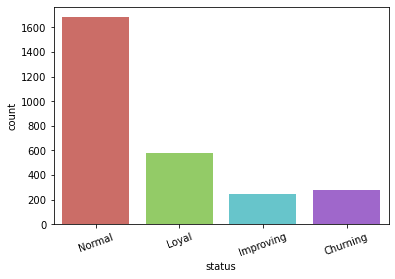

In [37]:
chart=sns.countplot(x='status',data=joined,palette='hls')
chart.set_xticklabels(chart.get_xticklabels(), rotation=20)